# DATA SCIENCE SESSIONS VOL. 3
### A Foundational Python Data Science Course
## Session 14: Multiple Linear Regression. One-Hot Encoding. Nested Models.

[&larr; Back to course webpage](https://datakolektiv.com/)

Feedback should be send to [goran.milovanovic@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com). 

These notebooks accompany the DATA SCIENCE SESSIONS VOL. 3 :: A Foundational Python Data Science Course.

![](../img/IntroRDataScience_NonTech-1.jpg)

### Lecturers

[Goran S. Milovanović, PhD, DataKolektiv, Chief Scientist & Owner](https://www.linkedin.com/in/gmilovanovic/)

[Aleksandar Cvetković, PhD, DataKolektiv, Consultant](https://www.linkedin.com/in/alegzndr/)

[Ilija Lazarević, MA, DataKolektiv, Consultant](https://www.linkedin.com/in/ilijalazarevic/)

![](../img/DK_Logo_100.png)

***

## 1. Multiple Linear Regression

In [1]:
### --- Setup - importing the libraries

# - supress those annoying 'Future Warning'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# - visualization
import matplotlib.pyplot as plt
import seaborn as sns



# - parameters
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_theme()

# - rng
rng = np.random.default_rng()

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

In [2]:
# - loading the dataset
# - Kaggle: https://www.kaggle.com/datasets/aungpyaeap/fish-market
# - place it in your _data/ directory
fish_data = pd.read_csv(os.path.join(data_dir, 'Fish.csv'))
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [3]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### Target: predict weight from all continuous predictors

In [4]:
model_frame = fish_data.drop(columns='Species')
model_frame

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

The formula for the Multiple Linear Regression Model has the form

$$y = \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \beta_0 + \varepsilon,$$

where 

- $y$ - the true value of target variable
- $x_1, x_2, \ldots, x_k$ - the predictors' values
- $\beta_1, \beta_2, \ldots, \beta_k$ - model's parameters for the predictors
- $\beta_0$ - the intercept of the model
- $\varepsilon$ - the residual

To predict a value $\hat{y}$ of the target variable via Multiple Linear Regression, we use

$$\hat{y} = \beta_1x_1 + \beta_2x_2 + \cdots + \beta_kx_k + \beta_0.$$

In [6]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Length1 + Length2 + Length3 + Height + Width'

In [7]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     236.2
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.95e-70
Time:                        23:05:11   Log-Likelihood:                -987.96
No. Observations:                 159   AIC:                             1988.
Df Residuals:                     153   BIC:                             2006.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -499.5870     29.572    -16.894      0.000    -558.010    -441.164
Length1       62.3552     40.209      1.551      0.123     -17.081     141.791
Length2       -6.5268     41.759     -0.156      0.876     -89.025      75.971
Length3      -29.0262     17.353     -1.673      0.096     -63.309       5.256
Height        28.2974      8.729      3.242      0.001      11.052      45.543
Width         22.4733     20.372      1.103      0.272     -17.773      62.720
==============================================================================
Omnibus:                       20.989   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.307
Skew:                           0.792   Prob(JB):                     1.18e-06
Kurtosis:                       4.269   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# - model's parameters
linear_model.params

Intercept   -499.586955
Length1       62.355214
Length2       -6.526752
Length3      -29.026219
Height        28.297351
Width         22.473307
dtype: float64

In [9]:
# - predicting the values using linear model's formula and parameters
model_frame['Predicted Weight'] = linear_model.predict()

In [10]:
# - calculating the residuals - the difference between the true and predicted values
model_frame['Residuals'] = linear_model.resid

In [11]:
model_frame

,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight,Residuals
0,242.0,23.2,25.4,30.0,11.5200,4.0200,326.816128,-84.816128
1,290.0,24.0,26.3,31.2,12.4800,4.3056,369.578593,-79.578593
2,340.0,23.9,26.5,31.1,12.3778,4.6961,370.824180,-30.824180
3,363.0,26.3,29.0,33.5,12.7300,4.4555,439.056139,-76.056139
4,430.0,26.5,29.0,34.0,12.4440,5.1340,444.169168,-14.169168
...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,-160.608116,172.808116
155,13.4,11.7,12.4,13.5,2.4300,1.2690,-145.535439,158.935439
156,12.2,12.1,13.0,13.8,2.2770,1.2558,-137.843413,150.043413
157,19.7,13.2,14.3,15.2,2.8728,2.0672,-83.279758,102.979758


In [12]:
# - some statistics on the residuals
model_frame['Residuals'].describe()

count    1.590000e+02
mean    -2.530247e-12
std      1.212449e+02
min     -2.436873e+02
25%     -6.509770e+01
50%     -2.552057e+01
75%      5.798004e+01
max      4.472475e+02
Name: Residuals, dtype: float64

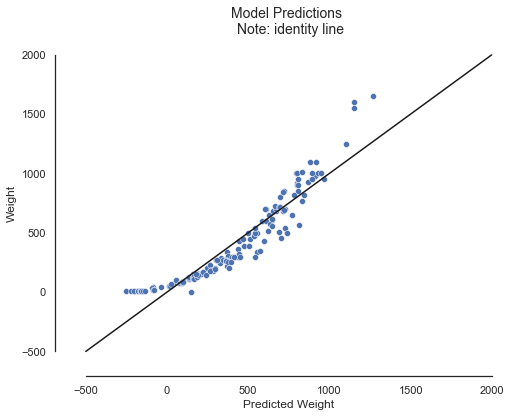

In [13]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-500, 2000), y=np.arange(-500, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

In [14]:
# - Pearson's correlation (R-value) coefficient and R^2
print(f"Pearson's correlation (R-value): {round(np.sqrt(linear_model.rsquared), 4)}")
print(f"Coefficient of determination (R^2): {round(linear_model.rsquared, 4)}")

Pearson's correlation (R-value): 0.9409
Coefficient of determination (R^2): 0.8853


In [15]:
# - p-values of the model's parameters
print(f"p-values: \n{linear_model.pvalues}")

p-values: 
Intercept    8.441362e-37
Length1      1.230186e-01
Length2      8.760053e-01
Length3      9.643079e-02
Height       1.458477e-03
Width        2.716892e-01
dtype: float64


In [16]:
# R^2 upacked - calculating R^2 using the corresponding formulas
total_sse = np.sum((model_frame['Weight'] - model_frame['Weight'].mean())**2)
model_sse = np.sum((model_frame['Predicted Weight'] - model_frame['Weight'].mean())**2)
residual_sse = np.sum(model_frame['Residuals']**2)


print(np.isclose(total_sse, model_sse + residual_sse))

True


In [17]:
# - yet another way to calculate R^2
model_sse/total_sse

0.8852867046546216

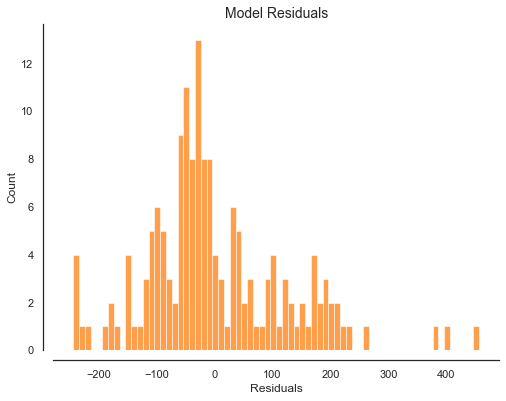

In [18]:
# - plotting the distribution of the residuals
plt.figure(figsize=(8, 6))
sns.histplot(data=model_frame, x='Residuals', binwidth=10, color='tab:orange')
sns.despine(offset=10, trim=False)
plt.title('Model Residuals', fontsize=14);

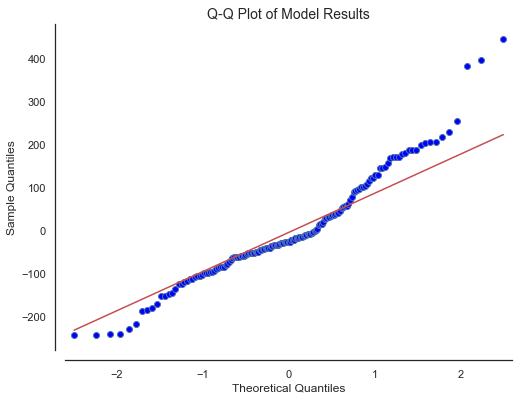

In [19]:
# - plotting the qqplot
sm.qqplot(model_frame['Residuals'].values, line='q')
sns.despine(offset=10)
plt.title('Q-Q Plot of Model Results', fontsize=14);

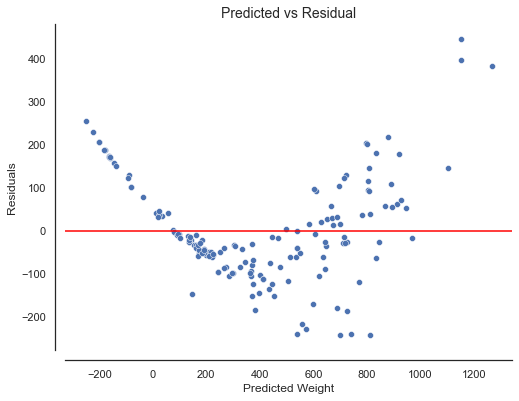

In [20]:
### --- Heteroskedacity

# - plotting the predicted values vs the residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Residuals')
sns.despine(offset=10)
plt.axhline(y=0, color='red')
plt.title('Predicted vs Residual', fontsize=14);

In [21]:
# - identifying the influental cases
model_inf = linear_model.get_influence()
inf_frame = model_inf.summary_frame()
inf_frame

,dfb_Intercept,dfb_Length1,dfb_Length2,dfb_Length3,dfb_Height,dfb_Width,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.014971,0.013313,0.015105,-0.061481,0.024483,-0.007549,0.002071,-0.697129,0.024926,-0.111461,-0.695954,-0.111273
1,-0.007100,0.011868,0.016926,-0.062002,0.023480,-0.012842,0.002076,-0.655179,0.028193,-0.111593,-0.653952,-0.111384
2,0.004293,0.029358,-0.014546,-0.026450,0.021258,-0.015360,0.000425,-0.255032,0.037721,-0.050493,-0.254251,-0.050339
3,0.002442,0.059705,-0.051392,-0.008673,-0.008840,0.031107,0.001918,-0.626276,0.028497,-0.107261,-0.625028,-0.107048
4,0.003725,0.004675,0.005207,-0.020717,0.016021,-0.014936,0.000106,-0.117607,0.043838,-0.025182,-0.117227,-0.025101
...,...,...,...,...,...,...,...,...,...,...,...,...
154,0.230454,0.097695,-0.103952,0.033734,-0.017510,-0.026127,0.011360,1.425865,0.032439,0.261079,1.430736,0.261971
155,0.228208,0.105397,-0.078481,-0.036793,0.057673,-0.093287,0.010625,1.313568,0.035630,0.252487,1.316714,0.253091
156,0.206981,0.028224,0.013098,-0.083006,0.075653,-0.126856,0.009100,1.239244,0.034333,0.233668,1.241434,0.234081
157,0.109987,-0.008234,0.010811,-0.009464,-0.010875,-0.008333,0.002564,0.844768,0.021105,0.124039,0.843973,0.123922


In [22]:
### --- Influence Measures

# - calculating the Cook's distance /Cook and Weisberg (1982)/
# - consider values with Cook's distance greater than 1 to be problematic

w_cookD = np.argwhere(model_inf.cooks_distance[0] > 1)
w_cookD

array([], shape=(0, 1), dtype=int64)

In [23]:
# - Leverage: hat values
# - Average Leverage = (k+1)/n
# - k - num. of predictors
# - n - num. observations
# - Also termed: hat values, range: 0 - 1
# - Various criteria (twice the average leverage, three times the average leverage...)

k = len(predictors)
n = len(model_frame)
w_leverage = np.argwhere(model_inf.hat_matrix_diag > 2*(k+1)/n)
w_leverage

array([[111],
       [113],
       [118],
       [129],
       [130],
       [141],
       [142],
       [143],
       [144]], dtype=int64)

In [24]:
### --- The influence plot
inf_plot_frame = pd.DataFrame(columns=['Residuals', 'Leverage', 'Cook Dist.'])

inf_plot_frame['Residuals'] = model_frame['Residuals']
inf_plot_frame['Leverage'] = model_inf.hat_matrix_diag
inf_plot_frame['Cook Dist.'] = model_inf.cooks_distance[0]

inf_plot_frame

,Residuals,Leverage,Cook Dist.
0,-84.816128,0.024926,0.002071
1,-79.578593,0.028193,0.002076
2,-30.824180,0.037721,0.000425
3,-76.056139,0.028497,0.001918
4,-14.169168,0.043838,0.000106
...,...,...,...
154,172.808116,0.032439,0.011360
155,158.935439,0.035630,0.010625
156,150.043413,0.034333,0.009100
157,102.979758,0.021105,0.002564


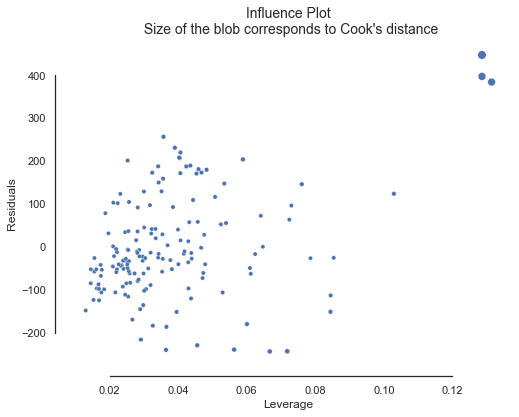

In [25]:
# - plotting the influence plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=inf_plot_frame, x='Leverage', y='Residuals', size='Cook Dist.', legend=None)
sns.despine(offset=10, trim=True)
plt.title("Influence Plot\n Size of the blob corresponds to Cook's distance", fontsize=14);

In [26]:
### --- Multicolinearity
model_frame[predictors].corr()

,Length1,Length2,Length3,Height,Width
Length1,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.867050,0.873547,0.878520,0.792881,1.000000


In [27]:
### --- Variance Inflation Factors (VIFs)

# - appending the columns of ones to the predictors' data
model_frame_predictors = sm.add_constant(model_frame[predictors])
model_frame_predictors

,const,Length1,Length2,Length3,Height,Width
0,1.0,23.2,25.4,30.0,11.5200,4.0200
1,1.0,24.0,26.3,31.2,12.4800,4.3056
2,1.0,23.9,26.5,31.1,12.3778,4.6961
3,1.0,26.3,29.0,33.5,12.7300,4.4555
4,1.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,1.0,11.5,12.2,13.4,2.0904,1.3936
155,1.0,11.7,12.4,13.5,2.4300,1.2690
156,1.0,12.1,13.0,13.8,2.2770,1.2558
157,1.0,13.2,14.3,15.2,2.8728,2.0672


In [28]:
# - computing VIFs

# - NOTE: 
# The lower bound of VIF is 1; 
# - there is no upper bound;
# - VIF > 2 indicates high variance inflation
vifs = [variance_inflation_factor(model_frame_predictors.values, i) for i in range(1, len(predictors)+1)]
vifs = np.array(vifs).reshape(1, -1)
vifs
pd.DataFrame(vifs, columns=predictors)

,Length1,Length2,Length3,Height,Width
0,1681.496487,2084.257828,422.468251,14.570087,12.275361


In [29]:
# - square roots of VIFs
pd.DataFrame(np.sqrt(vifs), columns=predictors)

,Length1,Length2,Length3,Height,Width
0,41.006054,45.653673,20.554032,3.817078,3.503621


### Multiple Linear Regression using scikit-learn


In [40]:
# - import scikit-learn
from sklearn.linear_model import LinearRegression

In [41]:
model_frame = fish_data.drop(columns='Species')

In [42]:
### --- Fitting the linear model to the numerical data

# - independent variables
X = model_frame.drop(columns='Weight')

# - the dependent variable
y = model_frame['Weight'].values.reshape(-1, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [43]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
          22.47330665]]),
 array([-499.58695536]))

In [44]:
# - calculating R^2 
lin_reg.score(X, y)

0.8852867046546207

In [45]:
# - predicting the weight using the model
y_pred = lin_reg.predict(X)
y_pred[:10]

array([[326.81612777],
       [369.57859339],
       [370.82418025],
       [439.05613854],
       [444.16916821],
       [466.12531938],
       [496.15134252],
       [473.62398623],
       [511.95189321],
       [540.44545602]])

## 2. One-Hot (Dummy) Encoding

### Target: predict weight from all the predictors (both categorical and continuous)

In [30]:
model_frame = fish_data.copy()
model_frame

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [31]:
# - number of data entries grouped by species class
model_frame['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [32]:
predictors = model_frame.columns.drop('Weight')
predictors

Index(['Species', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In one hot encoding categorical predictor 'split' into $C$ binary vectors, where $C$ is the number of categories. Each coordinate of this vector becomes a new "dummy" feature, corresponding to one category of a categorical variable. We won't write explicit mathematical formula of the model in this case, as it would require us going into some Linear Algebra and matrix-vector notation. 

In [33]:
# --- Composing the fomula of the model

# - right side of the formula
formula = ' + '.join(predictors)

# - left side of the formula
formula = 'Weight ~ ' + formula

formula

'Weight ~ Species + Length1 + Length2 + Length3 + Height + Width'

In [34]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           6.85e-82
Time:                        23:08:54   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -918.3321    127.083     -7.226      0.000   -1169.478    -667.186
Species[T.Parkki]      164.7227     75.699      2.176      0.031      15.123     314.322
Species[T.Perch]       137.9489    120.314      1.147      0.253     -99.819     375.717
Species[T.Pike]       -208.4294    135.306     -1.540      0.126    -475.826      58.968
Species[T.Roach]       103.0400     91.308      1.128      0.261     -77.407     283.487
Species[T.Smelt]       446.0733    119.430      3.735      0.000     210.051     682.095
Species[T.Whitefish]    93.8742     96.658      0.971      0.333     -97.145     284.893
Length1                -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                 79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                 32.5354     29.300      1.110      0.269     -25.369      90.439
Height                   5.2510     13.056      0.402      0.688     -20.551      31.053
Width                   -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The Referrence Category 

One-hot/dummy encoding can create a high collinearity between its dummy variables - this is called "dummy variable trap". To resolve this, we chose one category as a referrence and throw its corresponding dummy variable out of the model. Therefore, we have $C-1$ dummy variables, where $C$ is the number of categories.

In [36]:
# --- Composing the fomula of the model

# - right side of the formula; continuous predictors
num_predictors = predictors.drop('Species')
formula = ' + '.join(num_predictors)

# - right side of the formula; categorical predictor, one-hot encoded using the "Perch" category as the reference
formula = 'C(Species, Treatment(reference="Perch")) + ' + formula

# - left side of the formula
formula = 'Weight ~ ' + formula
formula

'Weight ~ C(Species, Treatment(reference="Perch")) + Length1 + Length2 + Length3 + Height + Width'

In [37]:
# - fitting the linear model to the data
linear_model = smf.ols(formula=formula, data=model_frame).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           6.85e-82
Time:                        23:09:21   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                              -780.3832     39.541    -19.736      0.000    -858.526    -702.240
C(Species, Treatment(reference="Perch"))[T.Bream]      -137.9489    120.314     -1.147      0.253    -375.717      99.819
C(Species, Treatment(reference="Perch"))[T.Parkki]       26.7738     65.378      0.410      0.683    -102.429     155.977
C(Species, Treatment(reference="Perch"))[T.Pike]       -346.3783     74.804     -4.630      0.000    -494.209    -198.548
C(Species, Treatment(reference="Perch"))[T.Roach]       -34.9090     47.802     -0.730      0.466    -129.377      59.559
C(Species, Treatment(reference="Perch"))[T.Smelt]       308.1244     42.941      7.176      0.000     223.263     392.985
C(Species, Treatment(reference="Perch"))[T.Whitefish]   -44.0747     52.938     -0.833      0.406    -148.693      60.544
Length1                                                 -80.3030     36.279     -2.214      0.028    -151.998      -8.608
Length2                                                  79.8886     45.718      1.747      0.083     -10.461     170.238
Length3                                                  32.5354     29.300      1.110      0.269     -25.369      90.439
Height                                                    5.2510     13.056      0.402      0.688     -20.551      31.053
Width                                                    -0.5154     23.913     -0.022      0.983     -47.773      46.742
==============================================================================
Omnibus:                       43.558   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.422
Skew:                           1.184   Prob(JB):                     7.00e-22
Kurtosis:                       6.016   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# - predicting the values
model_frame['Predicted Weight'] = linear_model.predict()
model_frame

,Species,Weight,Length1,Length2,Length3,Height,Width,Predicted Weight
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,282.291371
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,333.884974
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,353.901528
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,440.954349
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,439.309943
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,25.130994
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,30.149127
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,54.925142
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,118.706961


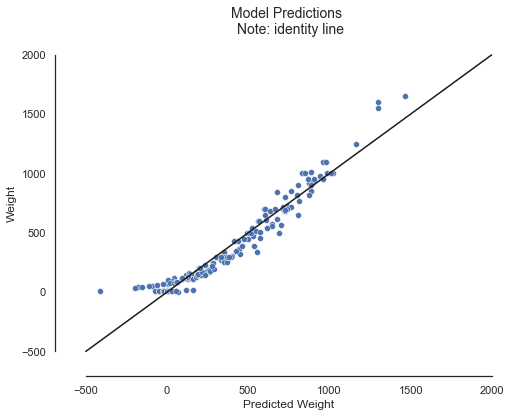

In [39]:
# - plotting the true values vs predicted values
# - the identity line (y=x) shows how good is the prediction - the closer the datapoint to the line, the better
sns.scatterplot(data=model_frame, x='Predicted Weight', y='Weight')
sns.lineplot(x=np.arange(-500, 2000), y=np.arange(-500, 2000), color='k')
sns.despine(offset=10, trim=True)
plt.title('Model Predictions \n Note: identity line', fontsize=14);

### One-Hot Encoding in scikit-learn

In [46]:
# - import One-Hot Encoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

In [47]:
model_frame = fish_data.copy()

In [48]:
### --- One-Hot Encoding the categories

# - feature matrix
X0 = model_frame.drop(columns='Weight')

# - extracting the categorical variable
cat_var = X0['Species'].values.reshape(-1, 1)

# - defining the One Hot Encoder; 'drop' argument defines which class to drop and use as a referrence
# - we need to specify 'sparse=False' in order for the encoder to give as a dense binary matrix
enc = OneHotEncoder(drop=['Perch'], sparse=False)

# - transforming categorical variable values into corresponding binary vectors
dummy = enc.fit_transform(cat_var)
dummy[:10]

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [49]:
### --- Fitting the linear model to the numerical data

# - independent variables

# - numerical variables
X0 = X0.drop(columns='Species').values

# - all the variables
X = np.concatenate((dummy, X0), axis=-1)

# - the dependent variable
y = model_frame['Weight'].values.reshape(-1, 1)


lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [50]:
# - coefficents of the model
lin_reg.coef_, lin_reg.intercept_

(array([[-137.94890963,   26.77375104, -346.37826625,  -34.90895507,
          308.12440784,  -44.07474158,  -80.30295196,   79.88863137,
           32.53538142,    5.25098766,   -0.51543798]]),
 array([-780.38323057]))

In [51]:
# - calculating R^2 
lin_reg.score(X, y)

0.9360849020585845

In [52]:
# - predicting the weight using the model
y_pred = lin_reg.predict(X)
y_pred[:10]

array([[282.29137079],
       [333.88497422],
       [353.90152808],
       [440.95434943],
       [439.30994261],
       [500.10509956],
       [496.44739798],
       [464.81628591],
       [475.00009312],
       [495.54295721]])

### The Role of Partial and Part Correlation in MLR

## 3. Nested Models

### Further Reading

***

DataKolektiv, 2022/23.

[hello@datakolektiv.com](mailto:goran.milovanovic@datakolektiv.com)

![](../img/DK_Logo_100.png)

<font size=1>License: [GPLv3](https://www.gnu.org/licenses/gpl-3.0.txt) This Notebook is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. This Notebook is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this Notebook. If not, see http://www.gnu.org/licenses/.</font>